# _MiSTree Tutorial 1_ - Lévy Flight

Random walk distributions draw step sizes randomly from a given probability distribution function. The walk begins at a point and ‘steps’ to a new point in a random direction.

These types of distributions were invented by Benoît Mandelbrot. The Lévy flight distribution is a specific random walk distribution useful for creating fractal distribution which exhibits power law clustering.

## (1) _2D vs 3D Lévy Flight distributions_

In these example we will look only at Lévy flight distribution, first in 2D and then 3D. All other parameters are kept to their default values. We will explore what the other parameters do later.

### (1.1) _2D Lévy Flight Distribution_

In this example we show how to generate a random walk distribution in 2D. Since the default setting is in 3D we will need to specify that we want this in 2D.

Before this we need to first import some basic modules for plotting and MiSTree itself.

In [37]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt
import mistree as mist

To generate a 2D Lévy flight sample, we will need to first specify how many points we want in our random walk. This is given below by a parameter we call `size`. Be careful with the size, if you make this too large, because of the periodic boundary conditions, this will result in a distribution that is no different to a random distribution!

In [38]:
size = 50000
x, y = mist.get_levy_flight(size, mode='2D')

This will give you a clustered distribution which looks like this:

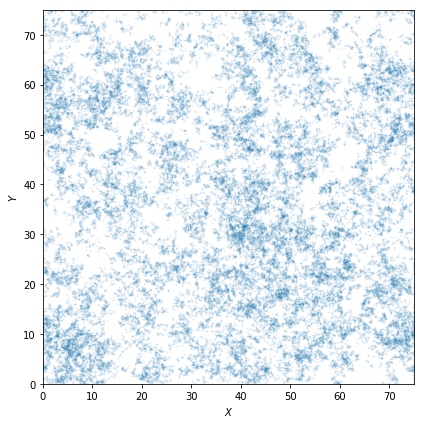

In [39]:
plt.figure(figsize=(6., 6.))
plt.plot(x, y, 'o', markersize=1., alpha=0.1)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.xlim(0., 75.)
plt.ylim(0., 75.)
plt.tight_layout()
plt.show()

### (1.2) _3D Levy Flight Distribution_

Creating a 3D distribution is even easier, since this is the default setting for all the random walk functions. Like before we again specify the size and generate the distribution in the following way:

In [48]:
size = 50000
x, y, z = mist.get_levy_flight(size)

We plot the 3 dimensions across 3 plains: X vs Y, X vs Z and Z vs Y:

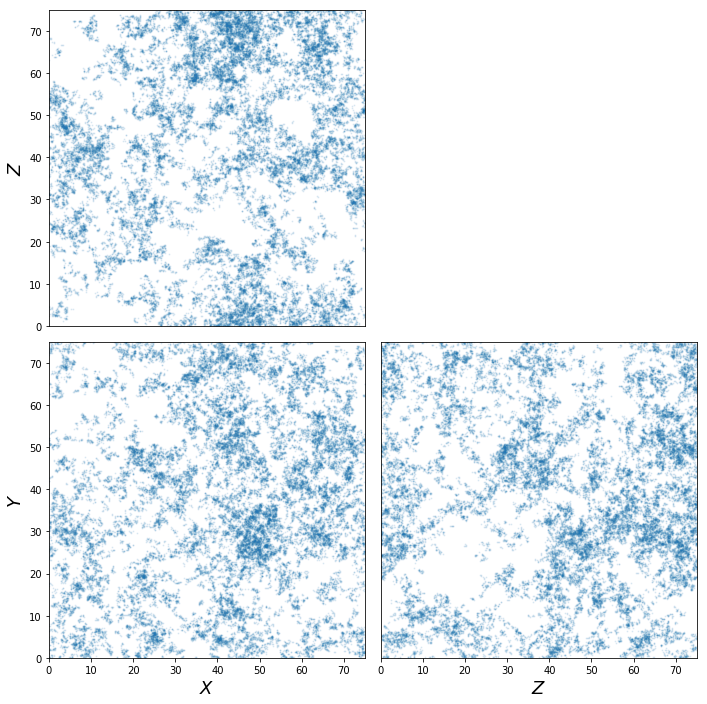

In [49]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(10., 10.))
gs = gridspec.GridSpec(2, 2, hspace=0.05, wspace=0.05)
gs.update(left=0.075, right=0.975, top=0.975, bottom=0.075)
ax1 = plt.subplot(gs[2])
ax2 = plt.subplot(gs[3])
ax3 = plt.subplot(gs[0])
ax1.plot(x, y, 'o', markersize=1, alpha=0.1)
ax2.plot(z, y, 'o', markersize=1, alpha=0.1)
ax3.plot(x, z, 'o', markersize=1, alpha=0.1)
ax1.set_xlabel(r'$X$', fontsize=18)
ax1.set_ylabel(r'$Y$', fontsize=18)
ax2.set_xlabel(r'$Z$', fontsize=18)
ax3.set_ylabel(r'$Z$', fontsize=18)
ax2.set_yticks([])
ax3.set_xticks([])
ax1.set_xlim(0., 75.)
ax1.set_ylim(0., 75.)
ax2.set_xlim(0., 75.)
ax2.set_ylim(0., 75.)
ax3.set_xlim(0., 75.)
ax3.set_ylim(0., 75.)
plt.show()

## (2) _Periodic boundaries and box sizes_

All random walk distributions created by MiSTree have periodic boundary conditions by default. This means that the box is repeated infinitely in all dimensions. This is a common procedure used in N-Body simulations. When a particle steps out of the boundary it actually re-enters the box from the other side. The size of the box can be specified by setting the `box_size` in any of the Lévy flight functions.

In [50]:
size = 50000

# default box_size=75.
x1, y1, z1 = mist.get_levy_flight(size, box_size=75.)

# changing the box_size=100.
x2, y2, z2 = mist.get_levy_flight(size, box_size=100.)

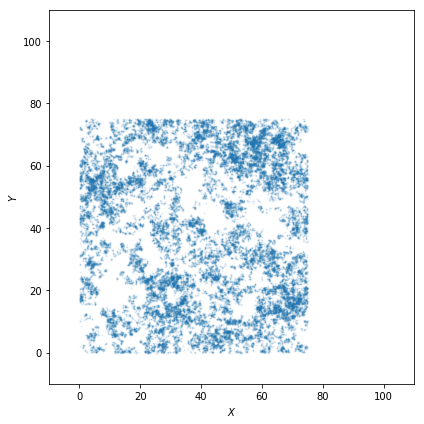

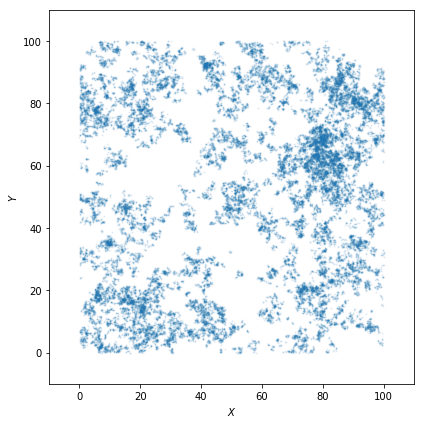

In [51]:
plt.figure(figsize=(6., 6.))
plt.plot(x1, y1, 'o', markersize=1., alpha=0.1)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.xlim(-10., 110.)
plt.ylim(-10., 110.)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6., 6.))
plt.plot(x2, y2, 'o', markersize=1., alpha=0.1)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.xlim(-10., 110.)
plt.ylim(-10., 110.)
plt.tight_layout()
plt.show()

However, if you want to turn this off you will need to set `periodic=False`.

In [52]:
size = 1000
x, y = mist.get_levy_flight(size, mode='2D', periodic=False)

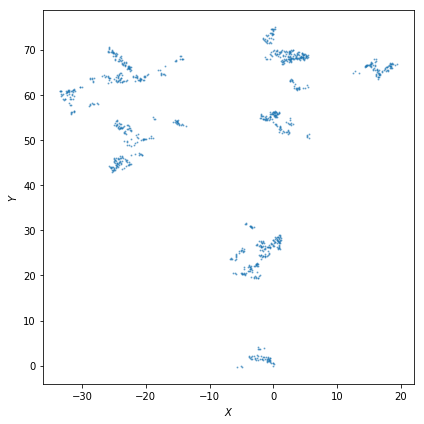

In [53]:
plt.figure(figsize=(6., 6.))
plt.plot(x, y, 'o', markersize=1., alpha=0.5)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.tight_layout()
plt.show()

## (3) _Random Walk Models_

Random walk distributions can be made by one of the Levy flight functions: ``get_levy_flight`` or ``get_adjusted_levy_flight`` which creates a distribution of Lévy flight and adjusted Lévy flight distributions, respectively. Both of these functions interact with the function ``get_random_flight`` which can be used to generate a random walk with your own specified probability distribution function
(PDF). Below we will explain in detail how these distributions work and what the parameters do in each model.

### (3.1) _Levy Flight_

Levy flights are defined with a power law PDF and a cumulative distribution function (CDF) given by,

$$
CDF(t) = \left\{ \begin{array}{lcl}
    0  & \mbox{for} & t < t_{0} \\
    1 - \left(\frac{t}{t_{0}}\right)^{-\alpha} & \mbox{for} & t\geq t_{0}
    \end{array} \right.
$$
    
Where:

- $t$ - step sizes
- $t_{0}$ - minimum step size.
- $\alpha$ - defines the slope of power law.

The PDF for the Lévy flight is given by,

$$
\begin{equation*}
PDF(t) = \left\{ \begin{array}{lcl}
0  & \mbox{for} & t < t_{0} \\
\alpha \frac{t_{0}^{\alpha}}{t^{1+\alpha}} & \mbox{for} & t\geq t_{0}
\end{array} \right.
\end{equation*}
$$

If we are to change t_{0}, which is the minimum step length, to shorter values this results in there being a higher probability of smaller step sizes.

In [70]:
def pdf_levy_flight(t, t0, alpha):
    pdf = np.zeros(len(t))
    condition = np.where(t >= t0)[0]
    pdf[condition] = alpha * (t0**alpha) / (t[condition]**(1.+alpha))
    return pdf

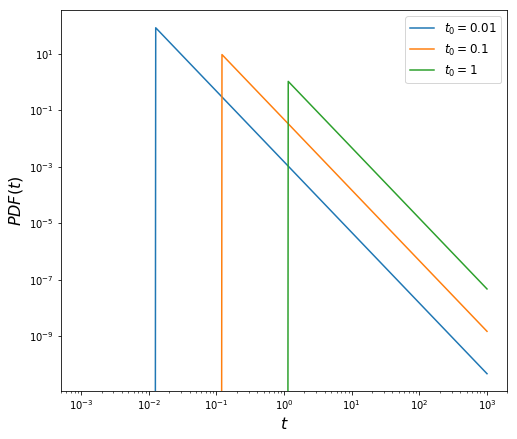

In [71]:
t = np.logspace(-3, 3) # t with equal log spacings.

plt.figure(figsize=(8, 7))
plt.plot(t, pdf_levy_flight(t, 0.01, 1.5), label=r'$t_{0}=0.01$')
plt.plot(t, pdf_levy_flight(t, 0.1, 1.5), label=r'$t_{0}=0.1$')
plt.plot(t, pdf_levy_flight(t, 1., 1.5), label=r'$t_{0}=1$')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$PDF(t)$', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best', fontsize=12)
plt.show()

We now generate a set of realisations with these parameters.

In [72]:
size = 50000 # how many particles in the distribution

x1, y1 = mist.get_levy_flight(size, t_0=0.01, alpha=1.5, mode='2D')
x2, y2 = mist.get_levy_flight(size, t_0=0.1, alpha=1.5, mode='2D')
x3, y3 = mist.get_levy_flight(size, t_0=1., alpha=1.5, mode='2D')

which are plotted:

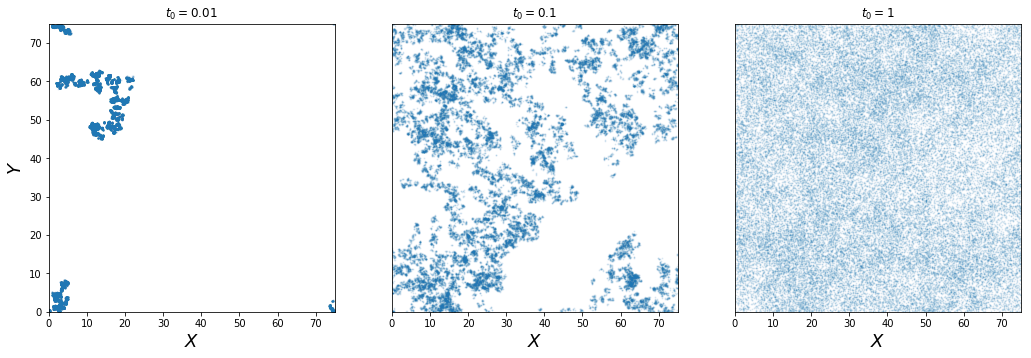

In [73]:
plt.figure(figsize=(15., 5.))
gs = gridspec.GridSpec(1, 3, hspace=0.025)
gs.update(left=0.05, right=0.95, top=0.925, bottom=0.125)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.plot(x1, y1, 'o', markersize=1, alpha=0.1)
ax2.plot(x2, y2, 'o', markersize=1, alpha=0.1)
ax3.plot(x3, y3, 'o', markersize=1, alpha=0.1)
ax1.set_xlabel(r'$X$', fontsize=18)
ax1.set_ylabel(r'$Y$', fontsize=18)
ax2.set_xlabel(r'$X$', fontsize=18)
ax3.set_xlabel(r'$X$', fontsize=18)
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xlim(0., 75.)
ax1.set_ylim(0., 75.)
ax2.set_xlim(0., 75.)
ax2.set_ylim(0., 75.)
ax3.set_xlim(0., 75.)
ax3.set_ylim(0., 75.)
ax1.set_title(r'$t_{0}=0.01$')
ax2.set_title(r'$t_{0}=0.1$')
ax3.set_title(r'$t_{0}=1.$')
plt.show()

if we instead vary $\alpha$ this changes the gradient of the slope.

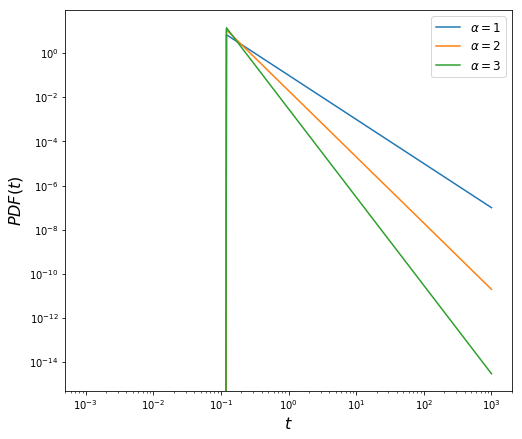

In [74]:
plt.figure(figsize=(8, 7))
plt.plot(t, pdf_levy_flight(t, 0.1, 1.), label=r'$\alpha=1$')
plt.plot(t, pdf_levy_flight(t, 0.1, 2.), label=r'$\alpha=2$')
plt.plot(t, pdf_levy_flight(t, 0.1, 3.), label=r'$\alpha=3$')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$PDF(t)$', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best', fontsize=12)
plt.show()

We now generate a set of realisations with these parameters.

In [75]:
size = 50000 # how many particles in the distribution

x1, y1 = mist.get_levy_flight(size, t_0=0.1, alpha=1., mode='2D')
x2, y2 = mist.get_levy_flight(size, t_0=0.1, alpha=1.5, mode='2D')
x3, y3 = mist.get_levy_flight(size, t_0=0.1, alpha=2., mode='2D')

Which we then plot:

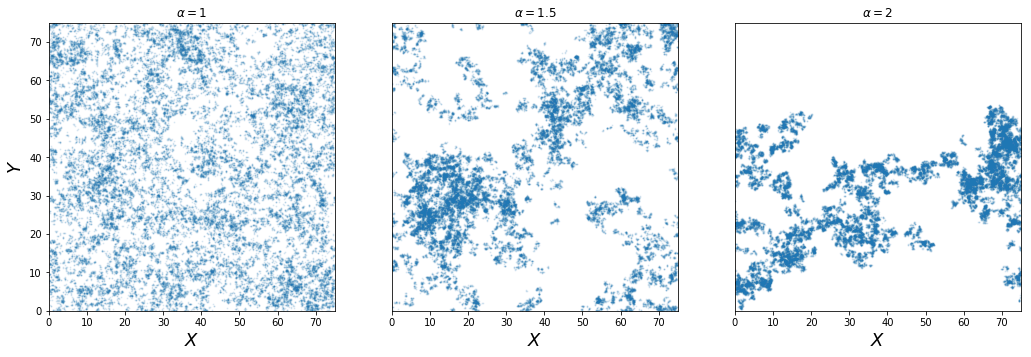

In [76]:
plt.figure(figsize=(15., 5.))
gs = gridspec.GridSpec(1, 3, hspace=0.025)
gs.update(left=0.05, right=0.95, top=0.925, bottom=0.125)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.plot(x1, y1, 'o', markersize=1, alpha=0.1)
ax2.plot(x2, y2, 'o', markersize=1, alpha=0.1)
ax3.plot(x3, y3, 'o', markersize=1, alpha=0.1)
ax1.set_xlabel(r'$X$', fontsize=18)
ax1.set_ylabel(r'$Y$', fontsize=18)
ax2.set_xlabel(r'$X$', fontsize=18)
ax3.set_xlabel(r'$X$', fontsize=18)
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xlim(0., 75.)
ax1.set_ylim(0., 75.)
ax2.set_xlim(0., 75.)
ax2.set_ylim(0., 75.)
ax3.set_xlim(0., 75.)
ax3.set_ylim(0., 75.)
ax1.set_title(r'$\alpha=1$')
ax2.set_title(r'$\alpha=1.5$')
ax3.set_title(r'$\alpha=2$')
plt.show()

These two parameters can both be changed to affect the amount of clustering. But since $\alpha$ is directly related to the two point correlation function it is often considered to be the more important parameter.

### (3.2) _Adjusted Lévy Flight_

We developed a move flexible Lévy flight model to better deal with small scales.
Normal Lévy flight distributions are able to produce power law 2PCF, however below
$t_{0}$ the 2PCF plateaus. To be able to control what happens below this scale
we instead use a Lévy flight model which has a CDF:

$$
    \begin{equation*}
    CDF(t) = \left\{ \begin{array}{lcl}
    0  & \mbox{for} & t < t_{s} \\
    \beta\left(\frac{t-t_{s}}{t_{0}-t_{s}}\right)^{\gamma}& \mbox{for} & t_{s} \leq t < t_{0}\\
    (1-\beta)\left[1 - \left(\frac{t}{t_{0}}\right)^{-\alpha}\right]+\beta & \mbox{for} & t\geq t_{0}
    \end{array} \right.
    \end{equation*}
$$

which we call the *adjusted Levy flight*, where $t_{0}$ and $\alpha$
play the same role as they do in the normal Lévy flight distribution. The CDF
is built with two CDFs: (1) the normal Lévy flight part which operates for step sizes
larger than $t_{0}$ and (2) the adjusted part operates between step sizes
$t_{s}$ and $t_{0}$ where $t_{s} < t_{0}$. Unlike the normal
Lévy flight distribution, which transitions from a $PDF(t<t_{0}) = 0$ to a
peak at $PDF(t_{0})$ the adjusted Lévy flight has a gradual rise in between
$t_{s}$ and $t_{0}$. The other parameters have the following roles:

- $t_{s}$ - the minimum step sizes.
- $\beta$ - the fraction of steps between $t_{s}$ and $t_{0}$.
- $\gamma$ - the gradient of the rise.

The PDF is thus defined as:

$$
\begin{equation*}
    PDF(t) = \left\{ \begin{array}{lcl}
    0  & \mbox{for} & t < t_{s} \\
    \frac{\beta\gamma t}{(t-t_{s})}\left(\frac{t-t_{s}}{t_{0}-t_{s}}\right)^{\gamma}& \mbox{for} & t_{s} \leq t < t_{0}\\
    \frac{\alpha(1-\beta)}{t_{0}}t^{-(1+\alpha)} & \mbox{for} & t\geq t_{0}
    \end{array} \right.
    \end{equation*}
$$

Below we show what happens to the CDF of the adjusted Lévy flight distribution if we
vary these parameters individually whilst keeping all other parameters constant.


In [95]:
def cdf_adjusted_levy_flight(t, t_s=0.015, t_0=0.325, alpha=1.5, beta=0.45, gamma=1.3):
    cdf = np.zeros(len(t))
    condition = np.where((t >= t_s) & (t < t_0))[0]
    cdf[condition] = beta*((t[condition]-t_s)/(t_0-t_s))**gamma
    condition = np.where(t >= t_0)[0]
    cdf[condition] = (1.-beta)*(1-(t[condition]/t_0)**(-1.*alpha))+beta
    return cdf

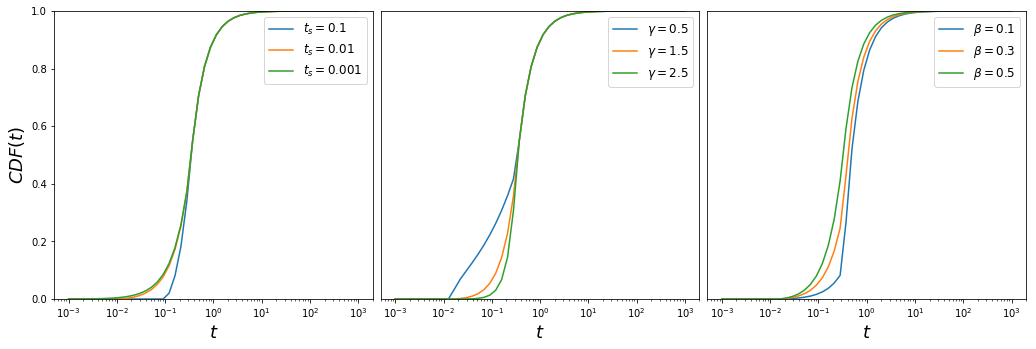

In [100]:
plt.figure(figsize=(15., 5.))
gs = gridspec.GridSpec(1, 3, wspace=0.025)
gs.update(left=0.05, right=0.95, top=0.925, bottom=0.125)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.plot(t, cdf_adjusted_levy_flight(t, t_s=0.1), label=r'$t_{s}=0.1$')
ax1.plot(t, cdf_adjusted_levy_flight(t, t_s=0.01), label=r'$t_{s}=0.01$')
ax1.plot(t, cdf_adjusted_levy_flight(t, t_s=0.001), label=r'$t_{s}=0.001$')
ax1.legend(loc='best', fontsize=12)

ax2.plot(t, cdf_adjusted_levy_flight(t, gamma=0.5), label=r'$\gamma=0.5$')
ax2.plot(t, cdf_adjusted_levy_flight(t, gamma=1.5), label=r'$\gamma=1.5$')
ax2.plot(t, cdf_adjusted_levy_flight(t, gamma=2.5), label=r'$\gamma=2.5$')
ax2.legend(loc='best', fontsize=12)

ax3.plot(t, cdf_adjusted_levy_flight(t, beta=0.1), label=r'$\beta=0.1$')
ax3.plot(t, cdf_adjusted_levy_flight(t, beta=0.3), label=r'$\beta=0.3$')
ax3.plot(t, cdf_adjusted_levy_flight(t, beta=0.5), label=r'$\beta=0.5$')
ax3.legend(loc='best', fontsize=12)

ax1.set_xlabel(r'$t$', fontsize=18)
ax1.set_ylabel(r'$CDF(t)$', fontsize=18)
ax2.set_xlabel(r'$t$', fontsize=18)
ax3.set_xlabel(r'$t$', fontsize=18)
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0., 1.)
ax2.set_ylim(0., 1.)
ax3.set_ylim(0., 1.)
plt.show()

### (3.3) Other Random Walk

To create a random walk distribution with a user defined steps, you will need to first generate a distribution of step sizes. To do this you will need to invert the CDF of a distribution and input random uniform values between 0 and 1. Once you have a distribution of step sizes you can pass this to the ``get_random_flight`` function.

We will step you through how to do this using a step size distribution which follows
a log normal distribution.


$$CDF(t) = \frac{1}{2} + \frac{1}{2} {\rm erf} \left[\frac{\ln t -\mu}{\sqrt{2}\sigma}\right]$$

To generate a random log normal distribution we invert this function giving us:

$$t = \exp \left[\sqrt{2}\sigma\ {\rm erf}^{-1}(2u-1) + \mu\right]$$

Where $CDF(t)=u$. Here, $u$ is a randomly drawn number between 0 and 1.
We can generate this in the following way:

In [ ]:
from scipy.special import erfinv
    
    size = 50000
    u = np.random.random_sample(size)

    mu = 0.1
    sigma = 0.05
    steps = np.exp(np.sqrt(2.)*sigma*erfinv(2.*u-1.)+mu)

    x, y = mist.get_random_flight(steps, mode='2D', box_size=75., periodic=True)

    plt.figure(figsize=(7., 7.))
    plt.plot(x, y, 'o', markersize=1., alpha=0.25)
    plt.xlabel(r'$X$', fontsize=18)
    plt.ylabel(r'$Y$', fontsize=18)
    plt.xlim(0., 75.)
    plt.ylim(0., 75.)
    plt.tight_layout()
    plt.show()